In [2]:
import cv2 #pip install opencv-python
from deepface import DeepFace #pip install deepface
import matplotlib.pyplot as plt

In [3]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
cap = cv2.imread('inputs/2.jpg')

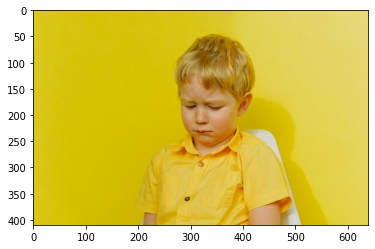

In [5]:
plt.imshow(cv2.cvtColor(cap, cv2.COLOR_BGR2RGB))

In [6]:
gray = cv2.cvtColor(cap,cv2.COLOR_BGR2GRAY) # convert the fram to Gray
faces = cascade.detectMultiScale(gray,1.2, 4) # detects faces in the image/frame        
font = cv2.FONT_HERSHEY_SIMPLEX # font of the text to show the emotion

for (x,y,w,h) in faces:
    res = DeepFace.analyze(cap, actions=['emotion'])
    cv2.rectangle(cap, (x,y), (x+w, y+h),(255,0,0) ,2)
    cv2.putText(cap,
        res['dominant_emotion'].capitalize(),
        (x,y-10),
        font, 1, 
        (0,255,0),
        3
    )

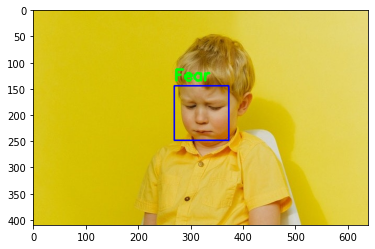

In [7]:
plt.imshow(cv2.cvtColor(cap, cv2.COLOR_BGR2RGB))

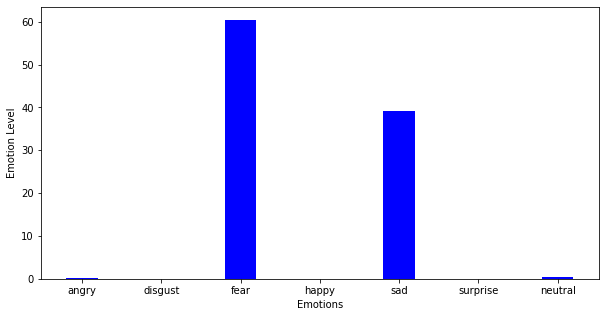

In [8]:
em = list(res['emotion'].keys())
val = list(res['emotion'].values())

fig = plt.figure(figsize=(10,5))

plt.bar(em, val, color='blue', width=0.4)
plt.xlabel("Emotions")
plt.ylabel("Emotion Level")
plt.show()